In [ ]:
import pandas as pd
import numpy as np
url = "https://drive.google.com/file/d/1v_fpLADHLG5ev6RPCDiaLJYRBMd_T-ss/view?usp=sharing"
path = f"https://drive.google.com/uc?export=download&id={url.split('/')[-2]}"
df = pd.read_csv(path)

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


* CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
* Geography—a customer’s location can affect their decision to leave the bank.
* Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
* Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
* Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
* Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
* NumOfProducts—refers to the number of products that a customer has purchased through the bank.
* HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
* IsActiveMember—active customers are less likely to leave the bank.
* EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
**Exited—whether or not the customer left the bank.**
* Complain—customer has complaint or not.
* Satisfaction Score—Score provided by the customer for their complaint resolution.
* Card Type—type of card hold by the customer.
* Points Earned—the points earned by the customer for using credit card.

Acknowledgements

As we know, it is much more expensive to sign in a new client than keeping an existing one.

It is advantageous for banks to know what leads a client towards the decision to leave the company.

Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.


# Delete the colums that has nothing to do with customer **churn**

In [ ]:
df.drop(columns=["RowNumber","CustomerId","Surname","Card Type"],inplace=True)

In [ ]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Features","Unique Values"]
for i in list(df.columns) :
    nunique =df[str(i)].nunique
    table.add_row([i, f"{nunique()}"])
print('Unique values in the dataset : \n')
print(table)

Unique values in the dataset : 

+--------------------+---------------+
|      Features      | Unique Values |
+--------------------+---------------+
|    CreditScore     |      460      |
|     Geography      |       3       |
|       Gender       |       2       |
|        Age         |       70      |
|       Tenure       |       11      |
|      Balance       |      6382     |
|   NumOfProducts    |       4       |
|     HasCrCard      |       2       |
|   IsActiveMember   |       2       |
|  EstimatedSalary   |      9999     |
|       Exited       |       2       |
|      Complain      |       2       |
| Satisfaction Score |       5       |
|    Point Earned    |      785      |
+--------------------+---------------+


In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,425


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Point Earned          0
dtype: int64

In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


the unique value of each columns

In [ ]:
column_of_interst=["Geography","Gender","NumOfProducts","HasCrCard","IsActiveMember","Exited"]

In [ ]:
unique_values={}
for column in column_of_interst:
  unique_values[column]=df[column].unique()
for column,values in unique_values.items():
  print(f"{column}:{values}")

Geography:['France' 'Spain' 'Germany']
Gender:['Female' 'Male']
NumOfProducts:[1 3 2 4]
HasCrCard:[1 0]
IsActiveMember:[1 0]
Exited:[1 0]


# Data Visualisation

In [ ]:
exit_counts=df["Exited"].value_counts(normalize=True)
exit_counts

Exited
0    0.7962
1    0.2038
Name: proportion, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

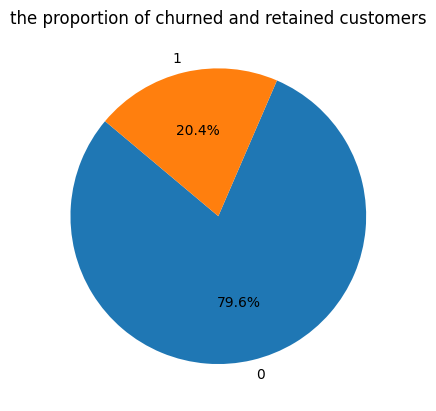

In [ ]:
plt.pie(exit_counts,labels=exit_counts.index,autopct="%1.1f%%",startangle=140)
plt.title("the proportion of churned and retained customers")
plt.show()

from this pie, we can see that retained is 20.4%, the churn is 79.6%,it is uneven

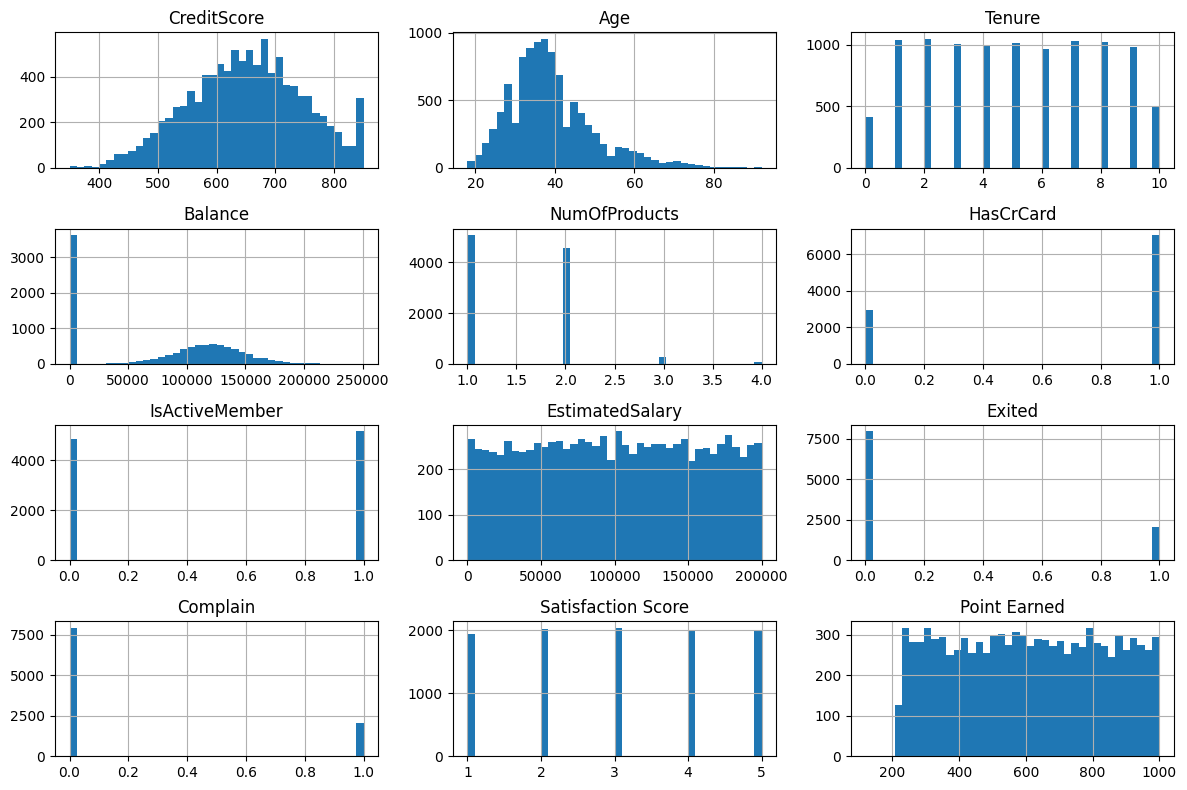

In [ ]:
df_numeric = df.select_dtypes(include=[int, float])
df_numeric.head(3)

df_numeric.hist(bins=40,figsize=(12,8))
plt.tight_layout()
plt.show()

lets select the data type that only has number

We can see: customers who make complains are more likely to leave our bank.
Do we take immmediatly actions when customers compalin?

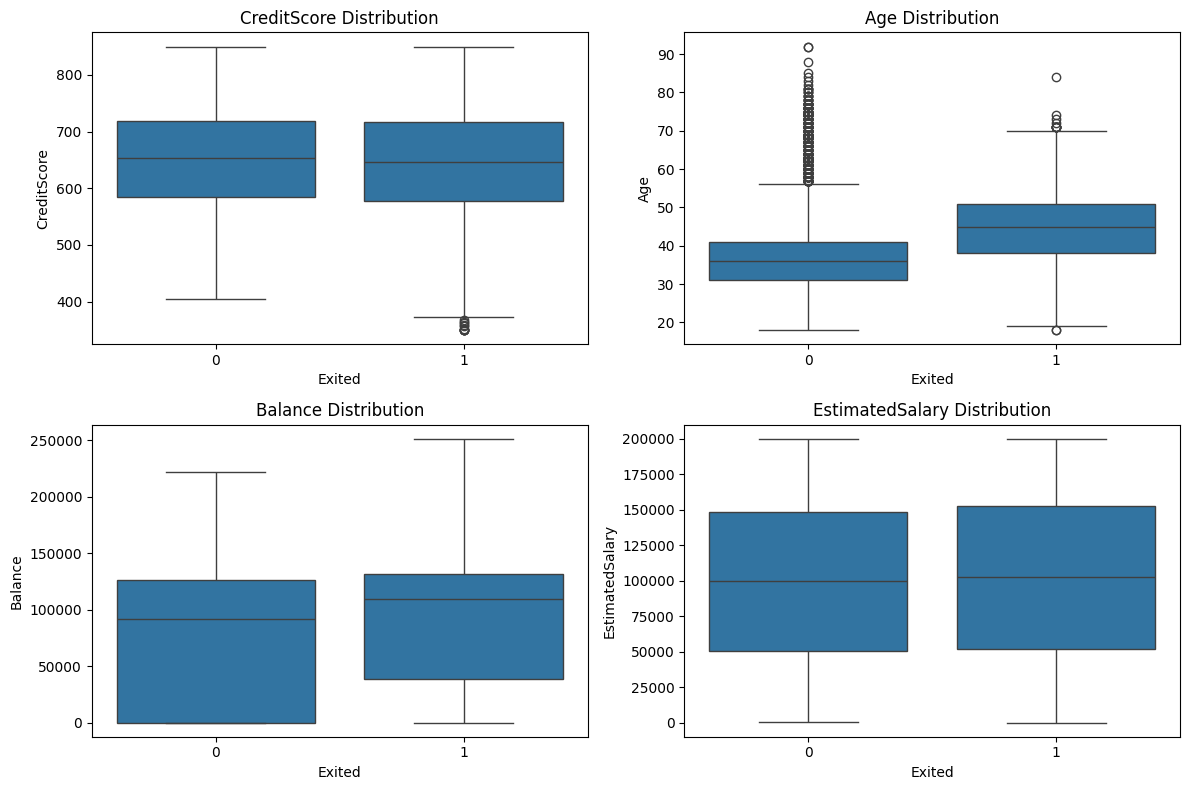

In [ ]:
# plt.subplots is a function from the Matplotlib library, which is used to create a figure and a set of subplots.
# len(cont_col.columns) // 2 calculates the number of rows by taking the number of columns in the cont_col DataFrame, dividing it by 2, and using integer division (//). This ensures that the total number of subplots is divided into the specified number of rows
cont_col=df_numeric[["CreditScore","Age","Balance","EstimatedSalary"]]

fig, axes=plt.subplots(nrows=len(cont_col.columns)//2,  ncols=2, figsize=(12,8))


for idx, column in enumerate(cont_col.columns):
    row_idx = idx // 2
    col_idx = idx % 2
    sns.boxplot(x="Exited", y=column, data=df_numeric, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_xlabel("Exited")
    axes[row_idx, col_idx].set_ylabel(column)
    axes[row_idx, col_idx].set_title(f"{column} Distribution")

# Adjust layout
plt.tight_layout()
plt.show()
# automatically adjust the spacing between subplots to ensure that they fit within the figure area nicely without overlapping.

# for idx, column in enumerate(cont_col.columns)::
# This loop iterates over the columns of the cont_col DataFrame.
# enumerate provides both the index (idx) and the column name (column) for each iteration.
# row_idx = idx // 2: This calculates the row index for the current subplot.
# col_idx = idx % 2: This calculates the column index for the current subplot.(%) gives the remainder of the division of the index by 2, determining which column the subplot should be in.

So we can see:
1. the age: people who likely to stay ages are around: 30-40;who likes to leave are ages between: 40-50
2. Balance: mostly people who likely to stay has balance: 0-125,000; who likes to leave has : 50,000 - 125,000

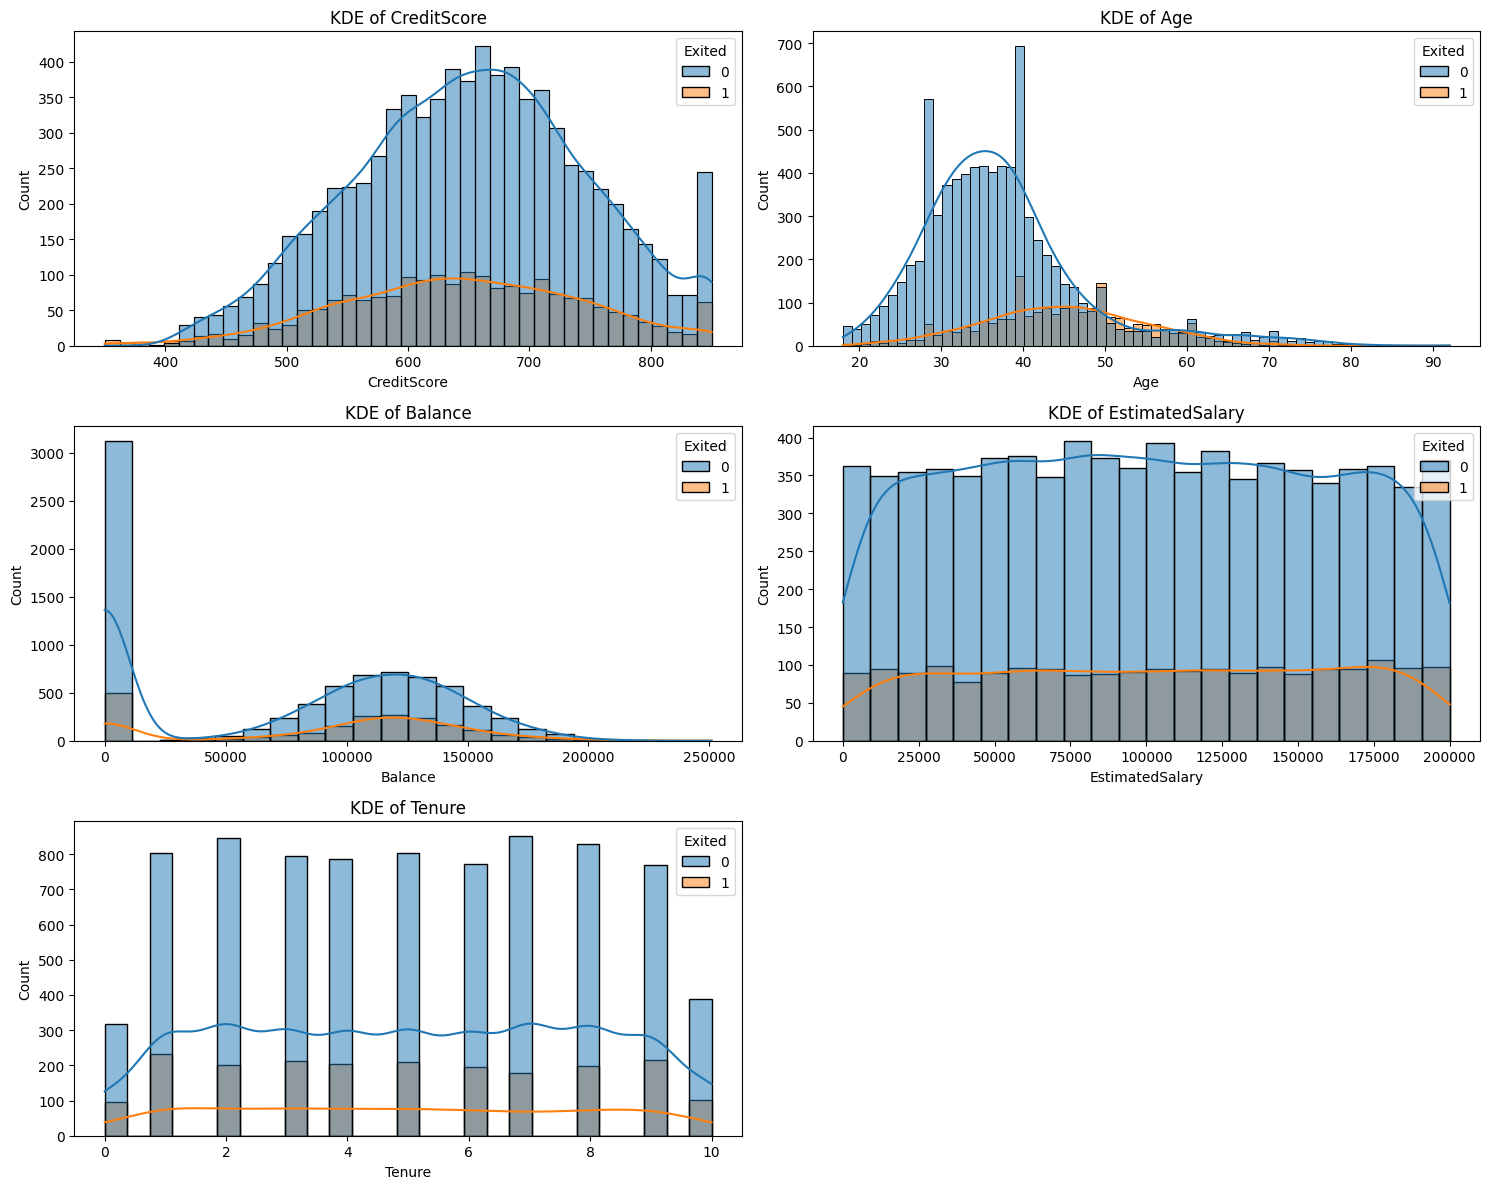

In [ ]:
cont_col=df_numeric[["CreditScore","Age","Balance","EstimatedSalary","Tenure"]]

plt.figure(figsize=(15,12))


for i,col in enumerate(cont_col.columns):
  plt.subplot(3,2,i+1)
  sns.histplot(data=df_numeric,x=col,fill=True,kde=True,hue="Exited")
  plt.title(f'KDE of {col}')
  plt.tight_layout()

plt.show()

So we can see that:
* 1.most customers(retation or churn) has cridtscore between:600 to 700; -->
* 2.customers who like to stay age are between:30 to 40; who likely to leave are between: 40 to 50;
* 3.the estimated salary of customers sililar,no matter stay or leave -->

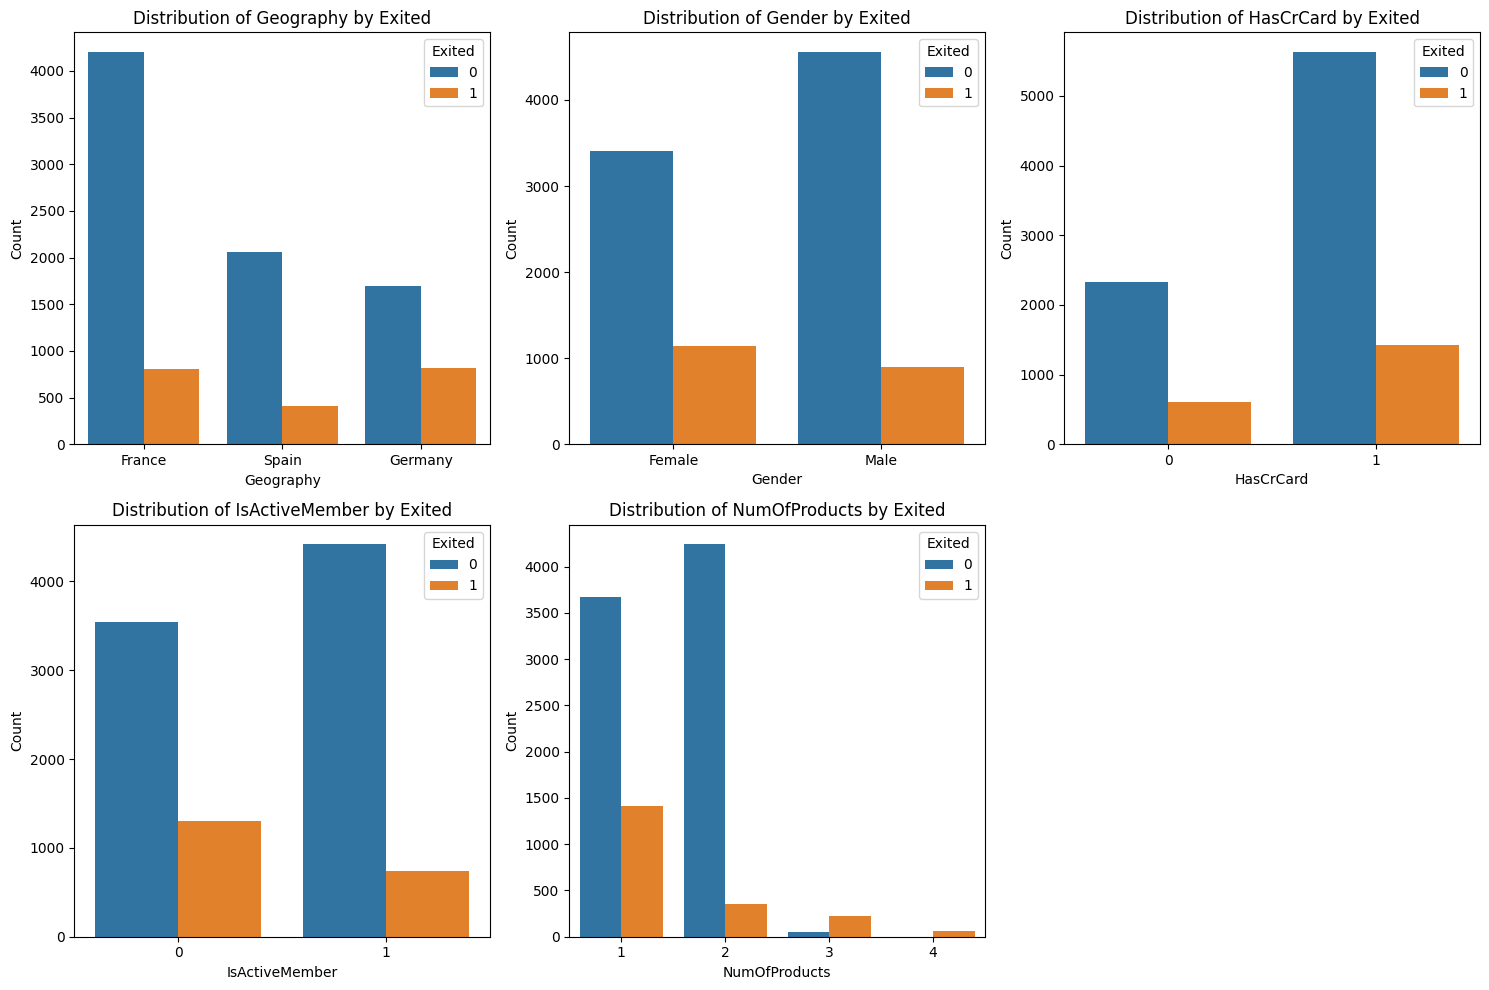

In [ ]:
disc_cols=["Geography","Gender","HasCrCard","IsActiveMember","NumOfProducts"]

fig, axs=plt.subplots(2,3,figsize=(15,10))

axs=axs.flatten()

for i,col in enumerate(disc_cols):
  sns.countplot(data=df,x=col,hue="Exited",ax=axs[i])
  axs[i].set_title(f"Distribution of {col} by Exited")
  axs[i].set_xlabel(col)
  axs[i].set_ylabel("Count")

for j in range(len(disc_cols),len(axs)):
  fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


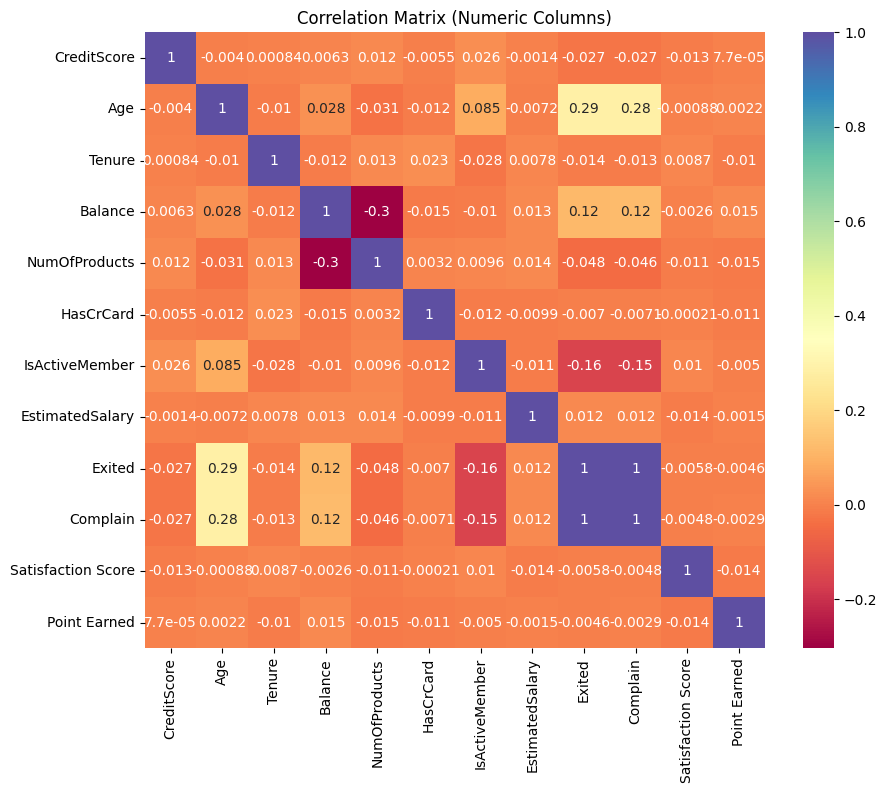

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True,cmap="Spectral")
plt.title('Correlation Matrix (Numeric Columns)')
plt.show()

So we can say:
* 1.Geography: there are more customers in France, but customers in Germany has a higher churn rate than other 2 counties;
* 2.Gender: there are more men customers than women, but woman customer are more likely to leave;
* 3.There are more customers have credicard. Customers who has creadit card are more likely to leave comparing to these who dont have credit cards;
* 4.Active customers are more likely to stay
* 5.if the number of products increased over 2, customers were likely to exit.

Building ML Predictive **Model**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score,\
                             classification_report)
from sklearn.svm import SVC
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

In [ ]:
df1=df.copy()

In [ ]:
df1.drop(columns=['Complain', 'Satisfaction Score', 'Point Earned'], inplace=True)

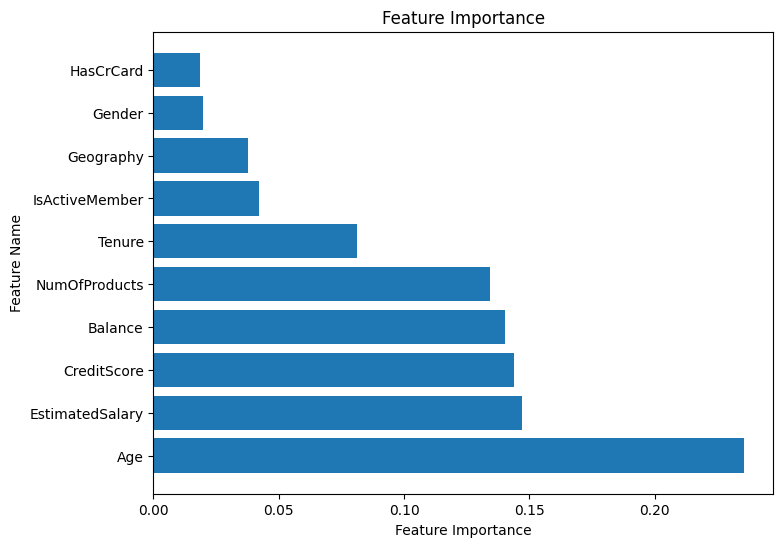

In [ ]:
ordinal_encoder = OrdinalEncoder()

columns_to_encode = ['Geography', 'Gender']

encoded_values = ordinal_encoder.fit_transform(df[columns_to_encode])

df_en = df1.copy()
df_en[columns_to_encode] = encoded_values

labels = df_en["Exited"].values

df_en.drop('Exited', axis=1, inplace=True)
features = df_en.values

train_features, test_features, train_labels, test_labels = train_test_split(features, labels,\
test_size=0.2, random_state=26)
scaler = StandardScaler()

train_features_scaled = scaler.fit_transform(train_features)

test_features_scaled = scaler.transform(test_features)
train_features_scaled_df = pd.DataFrame(data=train_features_scaled, columns=df_en.columns)

model=RandomForestClassifier(random_state=26)
model.fit(train_features_scaled,train_labels)
feature_importance=model.feature_importances_

feature_importance_df=pd.DataFrame({'Feature':train_features_scaled_df.columns,'Importance':feature_importance})

feature_importance_df=feature_importance_df.sort_values(by='Importance',ascending=False)
feature_importance_df

plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance')
plt.show()

Before training the model, it is essential to address the class imbalance present in the dataset, where the number of churn instances is significantly lower than that of non-churn instances.

To mitigate this imbalance and prevent the model from being biased towards the majority class, I used the Synthetic Minority Over-sampling Technique (SMOTE).

In [ ]:
#Importing and Initializing SMOTE:
sm = SMOTE(random_state=26)
#Applying SMOTE to the Training Data:
train_features_sm, train_labels_sm = sm.fit_resample(train_features_scaled, train_labels)
#Printing the Shape of Training Data Before and After SMOTE:
print(f'''Shape of train_features_scaled before SMOTE: {train_features_scaled.shape}
Shape of train_features_scaled after SMOTE: {train_features_sm.shape}''')
#Counting the Positive and Negative Classes After SMOTE:
print('\nCount  of  positive and negative classes (%): after SMOTE:')
train_labels_smSeries = pd.Series(train_labels_sm)
train_labels_smSeries.value_counts(normalize=True) * 100

Shape of train_features_scaled before SMOTE: (8000, 10)
Shape of train_features_scaled after SMOTE: (12676, 10)

Count  of  positive and negative classes (%): after SMOTE:


0    50.0
1    50.0
Name: proportion, dtype: float64

Hyperparameter Tuning and Cross-Validation:
Using hyperparameter tuning and cross-validation techniques, optimize and evaluate the performance of the selected machine learning model

In [ ]:
#Define Models and Hyperparameters
models = {
    'Logistic Regression': (LogisticRegression(), {'C': [0.1, 1, 10]}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [None, 5, 10]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': range(50, 600, 50)}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': range(3, 21, 2)}),
    'SVM': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'XGBoost': (XGBClassifier(), {'learning_rate': [0.1, 0.01], 'max_depth': range(3, 30, 3)})
}
#Initialize an Empty Dictionary for Final Models
final_models = {}#This dictionary will store the best model (after hyperparameter tuning) for each algorithm.
#Hyperparameter Tuning and Cross-Validation
for name, (model, params) in models.items():
    grid_search = GridSearchCV(model, params, cv=5, n_jobs=-1)#nitialize GridSearchCV with the model, its hyperparameters, 5-fold cross-validation (cv=5), and using all available cores (n_jobs=-1).
    grid_search.fit(train_features_sm, train_labels_sm)#Fit the model to the training data with SMOTE applied.
#Get the best hyperparameters found during the grid search
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_ #Get the best cross-validation score achieved with these hyperparameters.
    best_estimator = grid_search.best_estimator_#Get the best model

    print(f"Best parameters for {name}: {best_params}")
    print(f"Best cross-validation score for {name}: {best_score}")

    final_models[name] = best_estimator

Best parameters for Logistic Regression: {'C': 1}
Best cross-validation score for Logistic Regression: 0.6970653438610246
Best parameters for Decision Tree: {'max_depth': None}
Best cross-validation score for Decision Tree: 0.8244007242454222
Best parameters for Random Forest: {'n_estimators': 300}
Best cross-validation score for Random Forest: 0.9054967365401726
Best parameters for KNN: {'n_neighbors': 3}
Best cross-validation score for KNN: 0.8649421972511029
Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}
Best cross-validation score for SVM: 0.8340972753688114


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 21}
Best cross-validation score for XGBoost: 0.8985575756444477


We use the best hyperparameters for each of the models mentioned above to fit, predict, and calculate the accuracy, AUC, and F1 scores for each model. Based on the cross-validation scores, the RandomForestClassifier is the best-performing model.

In [ ]:
#Initialize Lists for Metrics
model_name=[]
accuracy=[]
roc_auc=[]
F1_score=[]
#Define Models with Hyperparameters
models=[
     LogisticRegression(C=1, random_state=26),
     DecisionTreeClassifier(max_depth=3, random_state=26),
     RandomForestClassifier(n_estimators=300, random_state=26),
     KNeighborsClassifier(n_neighbors=3),
     XGBClassifier(learning_rate=0.1, max_depth=21, random_state=26)

]
#Train, Predict, and Calculate Metrics for Each Model
for model in models:
    model.fit(train_features_sm, train_labels_sm)#Train the model using the SMOTE-applied training data.
    prediction = model.predict(test_features_scaled)#Make predictions on the test data.
    y_predict=model.predict_proba(test_features_scaled)[:, 1]#Get the predicted probabilities for the positive class. This is used to calculate the AUC.
    model_name.append(model.__class__.__name__)#Store the name of the model
    accuracy.append((accuracy_score( prediction , test_labels ) * 100 ) )#Calculate and store the accuracy score.
    roc_auc.append((roc_auc_score(test_labels , y_predict)*100) )#Calculate and store the AUC score.
    F1_score.append((f1_score(test_labels , prediction)* 100) )#Calculate and store the F1 score.
#Shorten Model Names for Display
model_name_shortened = ['LogisticRegression', 'DecisionTree','RandomForest', 'KNeighbors','XGBClassifier']
#Create and Display a DataFrame with Model Performance Metrics
models_df = pd.DataFrame({"Model-Name":model_name_shortened, "Accuracy": accuracy ,'AUC':roc_auc ,'F1-Score':F1_score})
#models_df = models_df.drop(columns='Model-Name').columns.astype(float)#models_df.sort_values("AUC", ascending = False)
models_df

,Model-Name,Accuracy,AUC,F1-Score
0,LogisticRegression,68.70,75.907432,44.404973
1,DecisionTree,78.15,80.272066,53.854277
2,RandomForest,84.50,85.700693,58.994709
3,KNeighbors,76.45,76.350504,51.889683
4,XGBClassifier,84.60,84.750518,58.265583


from matplotlib import pyplot as plt
models_df['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models_df['AUC'].plot(kind='hist', bins=20, title='AUC')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models_df['F1-Score'].plot(kind='hist', bins=20, title='F1-Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
models_df.groupby('Model-Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models_df.plot(kind='scatter', x='Accuracy', y='AUC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models_df.plot(kind='scatter', x='AUC', y='F1-Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models_df['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
models_df['AUC'].plot(kind='line', figsize=(8, 4), title='AUC')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
models_df['F1-Score'].plot(kind='line', figsize=(8, 4), title='F1-Score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(models_df['Model-Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(models_df, x='Accuracy', y='Model-Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(models_df['Model-Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(models_df, x='AUC', y='Model-Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(models_df['Model-Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(models_df, x='F1-Score', y='Model-Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['AUC'].plot(kind='hist', bins=20, title='AUC')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['F1-Score'].plot(kind='hist', bins=20, title='F1-Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Model-Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='Accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Accuracy', y='AUC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='AUC', y='F1-Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Accuracy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model-Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model-Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Accuracy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['AUC']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model-Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model-Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('AUC')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['F1-Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model-Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model-Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('F1-Score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model-Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model-Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['AUC'].plot(kind='line', figsize=(8, 4), title='AUC')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['F1-Score'].plot(kind='line', figsize=(8, 4), title='F1-Score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['Model-Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='index', y='Model-Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Model-Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Accuracy', y='Model-Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Model-Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='AUC', y='Model-Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Model-Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='F1-Score', y='Model-Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

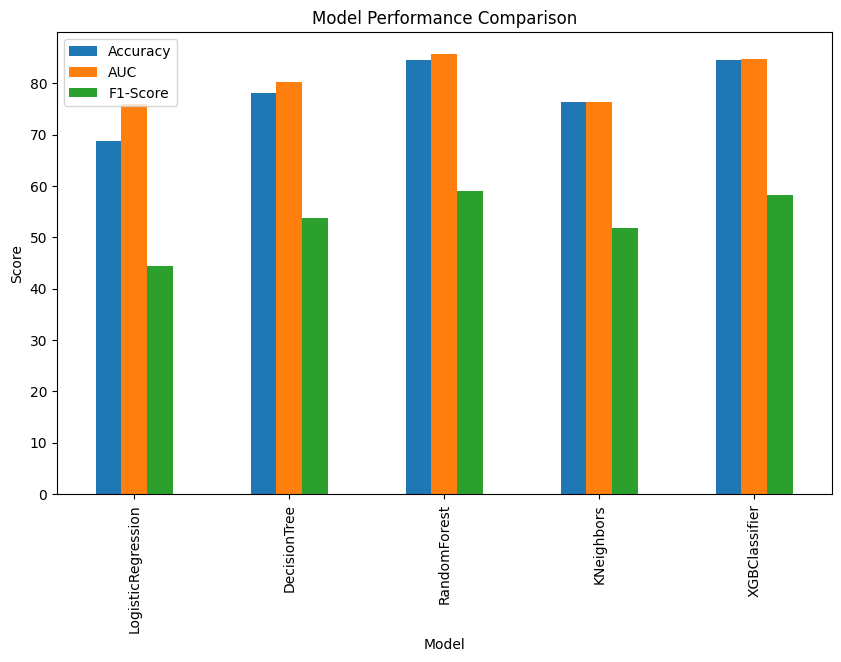

In [ ]:
models_df.plot(kind='bar', x='Model-Name', y=['Accuracy', 'AUC', 'F1-Score'], figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.show()

Taking all factors into account (cross-validation scores, accuracy, AUC, and F1 scores), the best-performing model is the RandomForestClassifier

In [ ]:
#Select the Random Forest Model
rforest_model = model_name[2]
#Use Predictions from the Last Iteration
rforest_prediction = prediction
print(rforest_model)
#Generate and Print the Classification Report
classification_rep = classification_report(test_labels, rforest_prediction)
print("RandomForestlassifier Classification Report:")
print(classification_rep)

RandomForestClassifier
RandomForestlassifier Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1624
           1       0.59      0.57      0.58       376

    accuracy                           0.85      2000
   macro avg       0.75      0.74      0.74      2000
weighted avg       0.84      0.85      0.84      2000



#Plot heatmap of the confusion matrix of the RandomForest Classifier

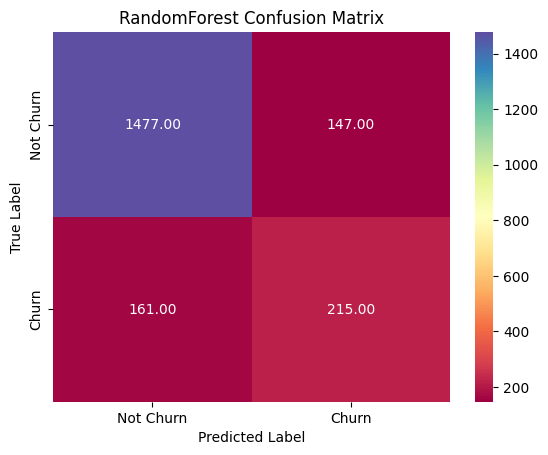

In [ ]:
sns.heatmap(confusion_matrix(test_labels, rforest_prediction), annot=True, cmap='Spectral', fmt='.2f', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('RandomForest Confusion Matrix')
plt.show()

In [ ]:
import joblib

joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']